<a href="https://colab.research.google.com/github/WambuiKahuthu/MORINGA_CORE_WEEK6_REGRESSION/blob/main/Moringa_Data_Science_Core_W6_Independent_Project_2021_08_Wambui_Kahuthu_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mchezopesa Football Results Predictions


## Overview

**i. Understanding the context**  
I am acting as a data scientist at Mchezopesa Ltd and I have been tasked to design a models that will predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly  
   
**ii. Specifying the objective**  
The specific objective of this project is to design a model that will predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly  
  
**iii. Defining the metric for success**  
The project will be considered successful when the created models are at least 80% accurate in predicting the results of the matches 
  
**iv. Data relevance**  
The appropriate datasets for this projects are ones that contain data on the results of different matches and the rankings of the teams during those matches

**v. Project design**  
In order to work on the above problem, we need to do the following:

a. Acquire the datasets with appropriate data for our project     
b. Perform data cleaning by dropping irrelevant data, finding and dealing with duplicates, missing data, and anomalies  
c. Merge our datasets in case there are multiple datasets
d. Perform descriptive analysis to gain insights on the given data     
e. Create and test the models that will work towards accomplishing our objective  
f. Give conclusions and recommendations on the different models     





## Importing Libraries

In [337]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt


## Loading the Dataset 

In [338]:
# load dataset with ranking data (downloaded from https://moringaschool.instructure.com/courses/352/assignments/3624)
rankings = pd.read_csv('/content/fifa_ranking.csv')

# load dataset with tournament data (downloaded from https://moringaschool.instructure.com/courses/352/assignments/3624)
results = pd.read_csv('/content/results.csv')

## Reading the Datasets

### a. Rankings Dataset

In [339]:
# preview the top 5 entries of the dataset
rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [340]:
# check the general information about our dataset
# the information includes the number of entries and columns, name and data type of each column, number of non-null values in every column, and the distribution of each data type
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [341]:
# change data type of 'date' column
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])

### b. Results Dataset

In [342]:
# preview top 5 entries of the dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [343]:
# check the general information about our dataset
# the information includes the number of entries and columns, name and data type of each column, number of non-null values in every column, and the distribution of each data type
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [344]:
# change data type of 'date' column
results['date'] = pd.to_datetime(results['date'])

## Data Cleaning

### a. Rankings dataset

In [345]:
# check for duplicates in the dataset
print('Number of duplicates before cleaning: '+str(rankings.duplicated().sum()))

# drop duplicates
rankings = rankings.drop_duplicates()

# confirm that the duplicates have been dropped
print('Number of duplicates after cleaning: ' +str(rankings.duplicated().sum()))

Number of duplicates before cleaning: 37
Number of duplicates after cleaning: 0


In [346]:
# drop the irrelevant columns
rankings.drop(rankings.columns.difference(['rank','country_full', 'rank_date']), 1, inplace=True)

# rename 'country_full' to 'country' and 'rank_date' to 'date'
rankings.rename(columns={'country_full':'country', 'rank_date':'date'}, inplace=True)

In [347]:
# remove day from date to remain with  year and month data
rankings['date'] = rankings['date'].dt.strftime('%Y-%m')

In [348]:
# check for missing values in the dataset
rankings.isnull().sum()

rank       0
country    0
date       0
dtype: int64

In [349]:
# check for anomalies in the 'country' column by scrutinizing its unique values
rankings.country.unique()

array(['Germany', 'Italy', 'Switzerland', 'Sweden', 'Argentina',
       'Republic of Ireland', 'Russia', 'Brazil', 'Norway', 'Denmark',
       'England', 'France', 'Spain', 'Mexico', 'RCS', 'Netherlands',
       'Nigeria', 'Belgium', 'Colombia', 'Poland', 'Romania', 'Uruguay',
       'Portugal', 'Cameroon', 'Zambia', 'Egypt', 'Wales', 'USA',
       "Côte d'Ivoire", 'Scotland', 'Tunisia', 'Greece', 'Morocco',
       'Algeria', 'Ecuador', 'Korea Republic', 'Bulgaria', 'Austria',
       'Costa Rica', 'Northern Ireland', 'Honduras', 'Hungary', 'Japan',
       'Saudi Arabia', 'China PR', 'Canada', 'Finland', 'Ghana', 'Chile',
       'Zimbabwe', 'Qatar', 'Australia', 'Iceland', 'IR Iran',
       'United Arab Emirates', 'Yugoslavia', 'Iraq', 'Senegal', 'Bolivia',
       'Kuwait', 'Korea DPR', 'El Salvador', 'Turkey', 'Gabon', 'Guinea',
       'Thailand', 'Paraguay', 'Malawi', 'Israel', 'Peru', 'Zaire',
       'Cyprus', 'Singapore', 'Mali', 'Malaysia', 'Bermuda', 'Niger',
       'Syria', 'Bahr

There are no anomalies in the 'country' column

In [350]:
# preview top 5 entries of the cleaned dataset
rankings.head()

,rank,country,date
0,1,Germany,1993-08
1,2,Italy,1993-08
2,3,Switzerland,1993-08
3,4,Sweden,1993-08
4,5,Argentina,1993-08


In [351]:
# check the number of remaining records after cleaning
rankings.shape

(57756, 3)

### b. Results dataset

In [352]:
# check for duplicates in the dataset
print('Number of duplicates before cleaning: '+str(results.duplicated().sum()))

# drop duplicates
results = results.drop_duplicates()

# confirm that the duplicates have been dropped
print('Number of duplicates after cleaning: ' +str(results.duplicated().sum()))

Number of duplicates before cleaning: 0
Number of duplicates after cleaning: 0


In [353]:
# drop the irrelevant columns 
results.drop(['country','neutral', 'city'], axis=1, inplace=True)

In [354]:
# remove day from date to remain with  year and month data
results['date'] = results['date'].dt.strftime('%Y-%m')

In [355]:
# convert values in the 'tournament' column to two categories (Friendly and Other)

# create a function that defines the change
def tournament_type (y):
    if y == 'Friendly':
        return 'Friendly'
    return 'Other'
    
# apply the function to the 'tournament' column
results['tournament'] = results['tournament'].apply(lambda y: tournament_type(y))

In [356]:
# check for missing values in the dataset
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
dtype: int64

In [357]:
# check for anomalies in the 'home_team' column by scrutinizing the unique values
results.home_team.unique()

array(['Scotland', 'England', 'Wales', 'Northern Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Netherlands', 'Czechoslovakia',
       'Switzerland', 'Sweden', 'Germany', 'Italy', 'Chile', 'Norway',
       'Finland', 'Luxembourg', 'Russia', 'Denmark', 'Catalonia',
       'Basque Country', 'Brazil', 'Japan', 'Paraguay', 'Canada',
       'Estonia', 'Costa Rica', 'Guatemala', 'Spain', 'Brittany',
       'Poland', 'Yugoslavia', 'New Zealand', 'Romania', 'Latvia',
       'Galicia', 'Portugal', 'Andalusia', 'China PR', 'Australia',
       'Lithuania', 'Turkey', 'Central Spain', 'Mexico', 'Aruba', 'Egypt',
       'Haiti', 'Philippines', 'Bulgaria', 'Jamaica', 'Kenya', 'Bolivia',
       'Peru', 'Honduras', 'Guyana', 'Uganda', 'Belarus', 'El Salvador',
       'Barbados', 'Republic of Ireland', 'Trinidad and Tobago', 'Greece',
       'Curaçao', 'Dominica', 'Silesia', 'Guadeloupe', 'Israel',
       'Suriname', 'French Guiana', 'Cuba', 

There are no anomalies in the 'home_team' column

In [358]:
# check for anomalies in the 'away_team' column by scrutinizing the unique values
results.away_team.unique()

array(['England', 'Scotland', 'Wales', 'Northern Ireland', 'Canada',
       'Argentina', 'Hungary', 'Czechoslovakia', 'Uruguay', 'France',
       'Austria', 'Switzerland', 'Netherlands', 'Belgium', 'Germany',
       'Norway', 'Sweden', 'Italy', 'Chile', 'Catalonia', 'Finland',
       'Russia', 'Luxembourg', 'Denmark', 'Brazil', 'Basque Country',
       'United States', 'Philippines', 'Estonia', 'Provence',
       'El Salvador', 'Costa Rica', 'Paraguay', 'Yugoslavia', 'Poland',
       'Portugal', 'Spain', 'Romania', 'Australia', 'Central Spain',
       'Mexico', 'Galicia', 'Brittany', 'Asturias', 'China PR',
       'New Zealand', 'Latvia', 'Guatemala', 'Curaçao', 'Bulgaria',
       'Lithuania', 'Turkey', 'Egypt', 'South Africa', 'Jamaica', 'Japan',
       'Republic of Ireland', 'Uganda', 'Bolivia', 'Haiti',
       'Trinidad and Tobago', 'Kenya', 'Ukraine', 'Honduras', 'Nicaragua',
       'Greece', 'Guyana', 'Peru', 'Aruba', 'Martinique', 'Barbados',
       'Cuba', 'Israel', 'Indonesia',

There are no anomalies in the 'away_team' column

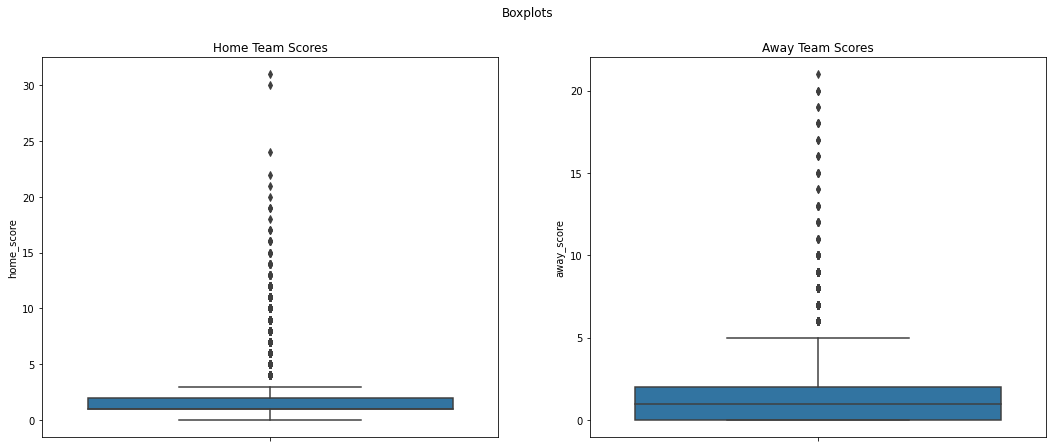

In [359]:
# check for outliers using boxplots

# specify the size of the figure
fig, ax = plt.subplots(1,2, figsize=(18,7))
# label the figure
fig.suptitle('Boxplots')

# plot the home team scores boxplot
sns.boxplot(data=results, y = "home_score", ax=ax[0])
# label the home team scores boxplot
ax[0].set_title('Home Team Scores')

# plot the home team scores boxplot
sns.boxplot(data=results, y = "away_score", ax=ax[1])
# label the away team scores boxplot
ax[1].set_title('Away Team Scores')

# display the figure
plt.show()

There is no justifiable reason to remove the outliers as they accurately reflect the number of goals scored by the teams, moreover since we have a large dataset, the outliers won't significantly affect the statistical summaries; therefore, we will retain them.

In [360]:
# preview top 5 entries of the cleaned dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament
0,1872-11,Scotland,England,0,0,Friendly
1,1873-03,England,Scotland,4,2,Friendly
2,1874-03,Scotland,England,2,1,Friendly
3,1875-03,England,Scotland,2,2,Friendly
4,1876-03,Scotland,England,3,0,Friendly


In [361]:
# check the number of remaining records after cleaning
results.shape

(40839, 6)

## Merging the Datasets

In [362]:
# merge 'rankings' and 'results' datasets by home team country and date using inner join
home_merge = pd.merge(results, rankings, how = 'inner' , right_on =['date', 'country'], left_on = ['date', 'home_team'])

# preview the top 5 entries of the merged dataset
home_merge.head()

,date,home_team,away_team,home_score,away_score,tournament,rank,country
0,1993-08,Colombia,Paraguay,0,0,Other,19,Colombia
1,1993-08,Colombia,Argentina,2,1,Other,19,Colombia
2,1993-08,Colombia,Peru,4,0,Other,19,Colombia
3,1993-08,Peru,Argentina,0,1,Other,70,Peru
4,1993-08,Peru,Colombia,0,1,Other,70,Peru


In [363]:
# rename 'rank' to 'home_team_rank' 
home_merge.rename(columns={'rank':'home_team_rank'},inplace=True)

In [364]:
# merge 'home_merge' and 'rankings' datasets by away team country and date
matches = pd.merge(home_merge, rankings, how = 'inner' , right_on =['date', 'country'], left_on = ['date', 'away_team'])

# preview the bottom 5 entries of the merged dataset
matches.tail()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,country_x,rank,country_y
16913,2018-06,Tunisia,England,1,2,Other,21,Tunisia,12,England
16914,2018-06,Japan,Paraguay,4,2,Friendly,61,Japan,32,Paraguay
16915,2018-06,Japan,Poland,0,1,Other,61,Japan,8,Poland
16916,2018-06,Argentina,Iceland,1,1,Other,5,Argentina,22,Iceland
16917,2018-06,Nigeria,Iceland,2,0,Other,48,Nigeria,22,Iceland


In [365]:
# rename 'rank' to 'away_team_rank'
matches.rename(columns={'rank':'away_team_rank'},inplace=True)

# drop the 'country_x' and 'country_y' columns
matches.drop(['country_x', 'country_y'],axis=1, inplace=True)

In [366]:
# preview the top 5 records of the dataset
matches.head()

,date,home_team,away_team,home_score,away_score,tournament,home_team_rank,away_team_rank
0,1993-08,Colombia,Paraguay,0,0,Other,19,67
1,1993-08,Argentina,Paraguay,0,0,Other,5,67
2,1993-08,Colombia,Argentina,2,1,Other,19,5
3,1993-08,Peru,Argentina,0,1,Other,70,5
4,1993-08,Paraguay,Argentina,1,3,Other,67,5


In [367]:
# check the number of records of dataset
matches.shape

(16918, 8)

In [368]:
# export the merged dataset as a csv file
matches.to_csv('matches.csv', index=False)

## Desciprive Analysis

Descriptive analysis will help us understand our dataset better

In [369]:
# find out the total number of distinct teams to play as a home team
print('The total number of teams to ever play as a home team is ' +str(matches['home_team'].nunique()))

# find out the total number of distinct teams to play as an away team
print('The total number of teams to ever play as an away team is ' +str(matches['away_team'].nunique()))

The total number of teams to ever play as a home team is 193
The total number of teams to ever play as an away team is 193


In [370]:
# compute the general statistical summaries of 'home_score' and 'away_score' columns
matches[['home_score', 'away_score']].describe()

,home_score,away_score
count,16918.000000,16918.000000
mean,1.603499,1.068448
std,1.615346,1.244975
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,15.000000


Other       0.618867
Friendly    0.381133
Name: tournament, dtype: float64


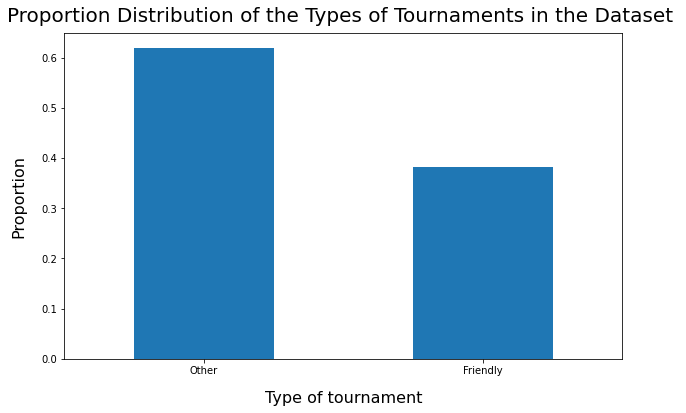

In [371]:
# plot a bar graph to show the proportions of the types of tournaments 

# display the proportions of the types of tournaments in a frequency table
print(matches.tournament.value_counts(normalize=True))

# specify the size of the figure  
fig, ax = plt.subplots(figsize=(10,6))

# plot the bar graph
(matches['tournament'].value_counts(normalize=True)).plot.bar()

# labelling the bar chart 
plt.title('Proportion Distribution of the Types of Tournaments in the Dataset ', fontsize=20, y=1.015)
# labelling the x axis 
plt.xlabel('Type of tournament', fontsize=16, labelpad=15)
# rotate the labels on the x axis
plt.xticks(rotation = 360)
# labelling the y axis
plt.ylabel('Proportion', fontsize=16, labelpad=15)
#display bar chart
plt.show()

In [372]:
# find the highest home team rank
print('The highest rank in home teams is ' +str(matches['home_team_rank'].min()))
# find the lowest home team rank
print('The lowest rank in home teams is ' +str(matches['home_team_rank'].max()))
print('')
# find the highest home team rank
print('The highest rank in away teams is ' +str(matches['away_team_rank'].min()))
# find the lowest away team rank
print('The lowest rank in away teams is ' +str(matches['away_team_rank'].max()))

The highest rank in home teams is 1
The lowest rank in home teams is 209

The highest rank in away teams is 1
The lowest rank in away teams is 209


## Implementing the Solution

### Polynomial regression

We will use polynomial regression to create a model that predicts the results of a home team and another model that predicts the results of an away team based on the home team's rank, away team's rank and the tournament's type.  

These features are categorical in nature; therefore, it is unlikely that polynimial regression models will do well in accomplishing the objective of predicting the home teams' and away teams' scores, but we will use them just to see how they will fair   



#### Feature selection and engineering

In [373]:
# make a copy of our dataset
match_copy= matches.copy()

In [374]:
# feature selection
# drop the columns that are irrelevant to our regression model
match_copy.drop(['date','home_team', 'away_team'], axis=1, inplace=True)

In [375]:
# feature engineering
# import label encoder for label encoding
from sklearn.preprocessing import LabelEncoder 
lb=LabelEncoder()

# encode the values in 'tournament' column so that they can be in 0's and 1's 
match_copy['tournament']=lb.fit_transform(match_copy['tournament'].astype(str))

# check how the values have been transformed by comparing with the uncoded values in the original dataset
print(matches.tournament.value_counts())
print(match_copy.tournament.value_counts())

Other       10470
Friendly     6448
Name: tournament, dtype: int64
1    10470
0     6448
Name: tournament, dtype: int64


Other has been encoded as 1 while Friendly has been encoded as 0 

In [376]:
# preview the first entries of the dataframe with our features
match_copy.head()

,home_score,away_score,tournament,home_team_rank,away_team_rank
0,0,0,1,19,67
1,0,0,1,5,67
2,2,1,1,19,5
3,0,1,1,70,5
4,1,3,1,67,5


### Logistic regression

We will use logistic regression to create a model that predicts the result status of the home team after a match based on the home team's rank, away team's rank and tournament's type.  
  
We will use the dataset that has already been modified in the polynomial regression section above. 

#### Feature engineering and selection

In [377]:
# make a copy of our dataset
matches_copy= matches.copy()

In [378]:
# feature engineering
# import label encoder for label encoding
from sklearn.preprocessing import LabelEncoder 
lb=LabelEncoder()

# encode the values in 'tournament' column so that they can be in 0's and 1's 
matches_copy['tournament']=lb.fit_transform(matches_copy['tournament'].astype(str))

# check how the values have been transformed by comparing with the uncoded values in the original dataset
print(matches.tournament.value_counts())
print(matches_copy.tournament.value_counts())

Other       10470
Friendly     6448
Name: tournament, dtype: int64
1    10470
0     6448
Name: tournament, dtype: int64


Other has been encoded as 1 while Friendly has been encoded as 0 

In [379]:
# add column that shows if a game is a Win, Lose or Draw from the home team’s perspective

# create a function that defines the status of the match
def status (x):
   if x['home_score'] > x['away_score']:
      return 'Win'
   if x['home_score'] < x['away_score']:
      return 'Lose'
   return 'Draw'

# add a new column and apply the function
matches_copy['match_status'] = matches_copy.apply (lambda x: status(x), axis=1)

Win     0.483509
Lose    0.276569
Draw    0.239922
Name: match_status, dtype: float64


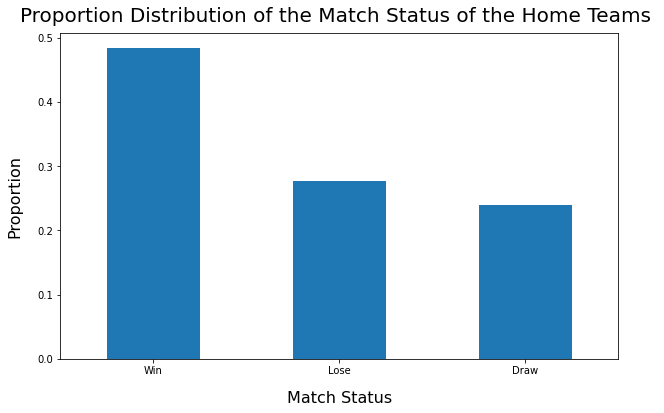

In [380]:
# plot a bar graph to show the proportions of the types of tournaments 

# display the proportions of the types of tournaments in a frequency table
print(matches_copy.match_status.value_counts(normalize=True))

# specify the size of the figure  
fig, ax = plt.subplots(figsize=(10,6))

# plot the bar graph
(matches_copy['match_status'].value_counts(normalize=True)).plot.bar()

# labelling the bar chart 
plt.title('Proportion Distribution of the Match Status of the Home Teams ', fontsize=20, y=1.015)
# labelling the x axis 
plt.xlabel('Match Status', fontsize=16, labelpad=15)
# rotate the labels on the x axis
plt.xticks(rotation = 360)
# labelling the y axis
plt.ylabel('Proportion', fontsize=16, labelpad=15)
#display bar chart
plt.show()

In [381]:
# feature selection
# drop the columns that are irrelevant to our regression model
matches_copy.drop(matches_copy.columns.difference(['home_team_rank', 'away_team_rank', 'tournament','match_status']), 1, inplace=True)


In [382]:
# since the columns contain categorical data (ordinal and nominal) we convert the data type of each column to'category'
matches_copy['tournament'] = matches_copy['tournament'].astype('category')
matches_copy['home_team_rank'] = matches_copy['home_team_rank'].astype('category')
matches_copy['away_team_rank'] = matches_copy['away_team_rank'].astype('category')

In [383]:
# preview the top 5 entries of the modified dataset
matches_copy.head()

,tournament,home_team_rank,away_team_rank,match_status
0,1,19,67,Draw
1,1,5,67,Draw
2,1,19,5,Win
3,1,70,5,Lose
4,1,67,5,Lose


In [384]:
# confirm that the dataset size is sufficient for our model by checking the number of records in the dataset
matches_copy.shape

(16918, 4)

There are 4 predictive features in our dataset and since the rule of thumb is that there should be at least 50 records per feature, we need to have at least 200 records in this dataset for it to be sufficient for modelling.Since out dataset has 16918 records, it is sufficient for modelling.

#### Modelling

In [385]:
# Preparing the Data

# divide the data into "attributes" and "labels" by assigning the attributes to variable X and the label to variable y 
X = matches_copy[['home_team_rank', 'away_team_rank', 'tournament']]
y = matches_copy["match_status"]

# Splitting our Data into Training and Test sets

# import train_test_split for the splitting of the data
from sklearn.model_selection import train_test_split

# split this data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify =matches_copy['tournament'], random_state=30)
# the script above splits 80% of the data to training set and 20% of the data to test set while maintaining the same proportions of tournament values

In [386]:
# Training the Algorithm

# import the desired model, in this this case we are importing logistic regression model
from sklearn.linear_model import LogisticRegression

# instantiate the model
model = LogisticRegression()

# train the algorithm by fitting the model to our training data 
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [387]:
# Making Predictions

# obtain the trained model's predictions of the 'match_status' based on X_test 
y_pred = model.predict(X_test) # the y_pred is a numpy array that contains all the predicted values

# create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Prediction': y_pred, 'Actual': y_test})

# display 10 random records in the comparison dataframe
df[:10]

,Prediction,Actual
285,Lose,Lose
3872,Lose,Lose
8704,Lose,Lose
5329,Win,Draw
5984,Win,Win
2146,Lose,Lose
1153,Lose,Draw
6695,Win,Draw
2746,Win,Lose
938,Lose,Lose


In [388]:
# Evaluating the Algorithm

# import accuracy_score to be used in testing the accuracy of the algorithm
from sklearn.metrics import accuracy_score

# use accuracy_score function to compute the accuracy of the algorithm by finding the proportion of correct predictions
accuracy = accuracy_score(y_test, y_pred)
# print the accuracy value
print('Accuracy: ', accuracy)

print("")
# An algorithm's performance can also be evaluated using a confusion matrix

# import confusion_matrix to be used in creating a confusion matrix of the predictions
from sklearn.metrics import confusion_matrix

# apply confusion matrix to y_test and y_pred to obtain number of correct and wrong predictions per category
confusion_matrix = confusion_matrix(y_test, y_pred)
# print the matrix
print('Confusion Matrix') 
print(confusion_matrix)

Accuracy:  0.5880614657210402

Confusion Matrix
[[   3  247  529]
 [   3  524  393]
 [   1  221 1463]]


The accuracy test shows that our algorithm is approximately 58.81% accurate in predicting the match status of the home team. The results from the confusion matrix tell us that 1990 (3+524+1463) is the total number of correct predictions and 1394 (247+529+393+221+1+3) is the total number of wrong predictions. (It should be noted that the model did not predict Draws)

In [389]:
# show the classification report of the model

# import classification_report from sklearn.metrics
from sklearn.metrics import classification_report

# apply the imported classification_report to y_test and y_pred to get the classification report of our model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Draw       0.43      0.00      0.01       779
        Lose       0.53      0.57      0.55       920
         Win       0.61      0.87      0.72      1685

    accuracy                           0.59      3384
   macro avg       0.52      0.48      0.42      3384
weighted avg       0.55      0.59      0.51      3384



The classification report shows that the model predicts wins better than losses and draws, and that it is poor at predicting draws. 

#### Hyperparameter tuning

To improve the performance of the model we will perform hyperparameter tuning using grid search

In [390]:
# create and instantiate logistic regression 
logistic = LogisticRegression(solver='newton-cg')

# create penalty regularization space
penalty = ['l1', 'l2', 'none', 'saga']

# create C regularization  space
C = [.001,.01, .1, 1,10,100,1000]

# create a dictionary of all the parameters and their corresponding set of values that we want to test for best performance
hyperparameters = dict(C=C, penalty=penalty)

In [391]:
# import grid search for the tuning
from sklearn.model_selection import GridSearchCV

# create an instance of the GridSearchCV class then pass values for the estimator parameter. 
# the values include the algorithm that we want to execute, the parameter dictionary we have created, the cv parameter which corresponds to number of folds, and finally 
# the n_jobs parameter which refers to the number of CPU's that we want to use for execution. n_jobs=-1 parameter means using all the available computing power.
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0, n_jobs=-1)

In [392]:
# fit the created grid search to the training data
best_model = clf.fit(X_train, y_train)

In [393]:
# view the best values of the hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 0.1


In [394]:
# obtain the tuned model's predictions of the 'match_status' based on X_test 
y_prediction=best_model.predict(X_test)

# create a dataframe that compares the actual output values for X_test with the predicted values
df2 = pd.DataFrame({'Prediction': y_prediction, 'Actual': y_test})# the y_pred is a numpy array that contains all the predicted values

# display 10 random records in the comparison dataframe
df[:10]

,Prediction,Actual
285,Lose,Lose
3872,Lose,Lose
8704,Lose,Lose
5329,Win,Draw
5984,Win,Win
2146,Lose,Lose
1153,Lose,Draw
6695,Win,Draw
2746,Win,Lose
938,Lose,Lose


In [395]:
# use accuracy_score function to compute the accuracy of the tuned algorithm by finding the proportion of correct predictions
accuracy1 = accuracy_score(y_test, y_prediction)
# print the accuracy value
print('Accuracy: ', accuracy1)

print("")

# import confusion_matrix to be used in creating a confusion matrix of the predictions
from sklearn.metrics import confusion_matrix

# apply confusion matrix to y_test and y_prediction to obtain number of correct and wrong predictions per category
confusion_matrix1 = confusion_matrix(y_test, y_prediction)
# print the matrix
print('Confusion Matrix') 
print(confusion_matrix1)

Accuracy:  0.5880614657210402

Confusion Matrix
[[   5  245  529]
 [   5  523  392]
 [   2  221 1462]]


After hyperparameter tuning the model's accuracy has remained the same at 58.81%. The confusion matrix shows  that the distribution has changed even though the accuracy of the model hasn't. The model is still poor at predicting 'draws'.

In [396]:
# show the classification report of the model

# import classification_report from sklearn.metrics
from sklearn.metrics import classification_report

# apply the imported classification_report to y_test and y_prediction to get the classification report of our tuned model
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

        Draw       0.42      0.01      0.01       779
        Lose       0.53      0.57      0.55       920
         Win       0.61      0.87      0.72      1685

    accuracy                           0.59      3384
   macro avg       0.52      0.48      0.43      3384
weighted avg       0.55      0.59      0.51      3384



The classification report shows that the model is better at predicting wins than it is at predicting losses and draws. The precision in detecting draws has reduced by 1%

#### **Conclusion**  
The nature of our features (ordinal and nominal data) was appropriate  in logistic regression modelling however the models' accuracy of approximately 58.81% (before and after hyperparameter tuning) is way below the desired accuracy of 80%, meaning that our model did not meet our objective. The model's low predictions of 'draws' could be due to class imbalance that can be balanced in subsequent models. 

#### **Recommendation**  
In order to improve the accuracy of our logistic regression model we could explore more classifiers which can learn rules from our data such as Decision Trees, we could optimize on other metrics such as Log Loss and F1-Score, we could check the scales of our gre and gpa features and normalize all our features to the same scale before putting them in a machine learning model,we could tune more parameters of the model, and if all of the above fail to improve the accuracy of the model, we could add more features.